In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.linear_model import LogisticRegression

from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
movies = pd.read_csv("movie.csv")
df=movies
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [45]:
df.duplicated().sum()

277

In [4]:
df=df.drop_duplicates()

In [5]:
df.duplicated().sum()

0

## EDA

In [6]:
# number of rows and columns
df.shape

(39723, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39723 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    39723 non-null  object
 1   label   39723 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 931.0+ KB


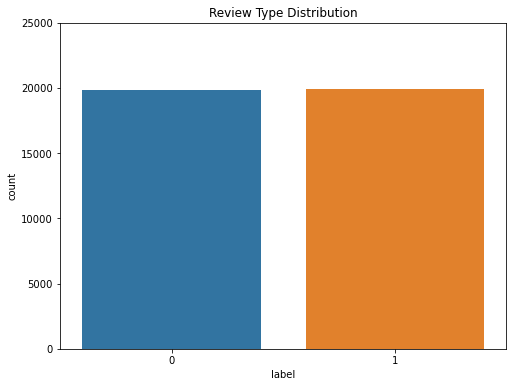

In [8]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='label', data=df)
ax.set_ylim(0,25000)
plt.title("Review Type Distribution")
plt.show()

In [9]:
df['label'].value_counts()

1    19908
0    19815
Name: label, dtype: int64

In [10]:
good_reviews_text = " ".join(df[df['label']==1].text.to_numpy().tolist())
bad_reviews_text = " ".join(df[df['label']==0].text.to_numpy().tolist())

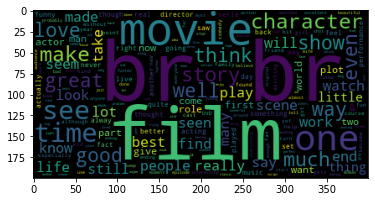

In [11]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud().generate(good_reviews_text)

plt.imshow(wordcloud);

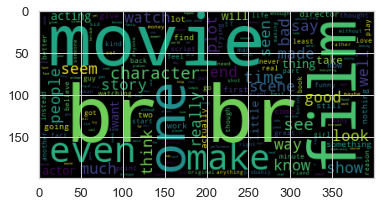

In [42]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud().generate(bad_reviews_text)

plt.imshow(wordcloud);

In [12]:
train_x, test_x, y_train, y_test = train_test_split(df.text,df.label, test_size=0.25,random_state=123)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=10000)  #max_feature is sorted?

X = vectorizer.fit_transform(train_x)

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

tfidf_df.iloc[0].sort_values(ascending=False).head(10)    #Question?  value means normalization?  TF*IDF?

run away     0.392150
away         0.310206
run          0.229408
power        0.168069
oh           0.148759
turtle       0.143104
tokyo        0.136772
breathing    0.133201
debt         0.133201
befriends    0.132056
Name: 0, dtype: float64

In [14]:
X

<29792x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2528019 stored elements in Compressed Sparse Row format>

In [15]:
vectorizer.get_feature_names()

['00',
 '000',
 '10',
 '10 10',
 '10 br',
 '10 lines',
 '10 minutes',
 '10 stars',
 '10 year',
 '10 years',
 '100',
 '1000',
 '101',
 '11',
 '12',
 '12 year',
 '12 years',
 '13',
 '13th',
 '14',
 '14 year',
 '15',
 '15 minutes',
 '15 years',
 '16',
 '17',
 '18',
 '18th',
 '19',
 '1930',
 '1930s',
 '1933',
 '1934',
 '1936',
 '1939',
 '1940',
 '1940s',
 '1941',
 '1942',
 '1944',
 '1945',
 '1946',
 '1950',
 '1950s',
 '1953',
 '1955',
 '1956',
 '1957',
 '1959',
 '1960',
 '1960s',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1970s',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1980s',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1990s',
 '1991',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '19th',
 '19th century',
 '1st',
 '20',
 '20 minutes',
 '20 years',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '20th',
 '20th century',

In [22]:
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

bow_df.head(20)

,00,000,10,10 10,10 br,10 lines,10 minutes,10 stars,10 year,10 years,...,zero,zeta,zeta jones,zizek,zoey,zombie,zombie movie,zombies,zone,zoom
0,0.0,0.107187,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.063722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.065308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
bow_df.head(100)

,00,000,10,10 10,10 br,10 lines,10 minutes,10 stars,10 year,10 years,...,zero,zeta,zeta jones,zizek,zoey,zombie,zombie movie,zombies,zone,zoom
0,0.0,0.107187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
count_words = bow_df.sum().sort_values(ascending=False)


In [27]:
count_words

br            2856.009401
movie         1474.928844
br br         1430.779731
film          1268.963594
like           713.528511
                 ...     
zizek            4.029178
rob roy          3.869225
kite             3.771053
undertaker       3.702668
hassan           3.476094
Length: 10000, dtype: float64

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, br to hassan
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   10000 non-null  float64
dtypes: float64(1)
memory usage: 414.3+ KB


In [19]:
from IPython.core.display import HTML,display

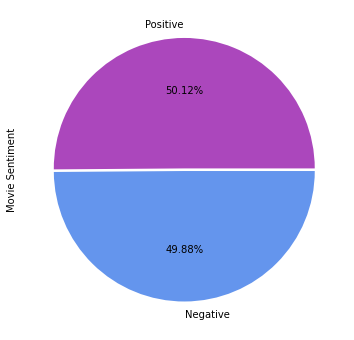

In [20]:
display(HTML("<h3 style='color:red;font-size:22px;padding:0px 0px 0px 70px;font-weight:bold; text-align:left'> Distribution of target</h3>"))
plt.figure(figsize=(10,6))
colors=['#AB47BC','#6495ED']
plt.pie(df['label'].value_counts(),labels=['Positive','Negative'],autopct='%.2f%%',explode=[0.01,0.01],colors=colors);
plt.ylabel('Movie Sentiment');

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

bow_df

In [56]:
model = DecisionTreeClassifier()

scores = cross_val_score(model, tfidf_df, y_train, cv=5, n_jobs=-1)

scores.mean()

0.7182333333333333

In [59]:
model = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(model, tfidf_df, y_train, cv=5, n_jobs=-1)

scores.mean()

0.7051333333333333

In [36]:
model = LogisticRegression()

scores = cross_val_score(model, tfidf_df, y_train, cv=5, n_jobs=-1)

scores.mean()

0.8853382020059757

In [39]:
from sklearn.metrics import classification_report